In [1]:
#site: https://deeplearning.vn/post/nhan-dien-chu-viet-pytorch/
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from torch import nn, optim
from torchvision import datasets, transforms

In [2]:
batch_size = 32
learning_rate = 0.01
num_epochs = 20

In [3]:
# Data Loader
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST("data", train=True, download=True,
                       transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307, ), (0.3081, )),
                               ])),
        batch_size=batch_size,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
        datasets.MNIST("data", train=False, download=True,
                       transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307, ), (0.3081, )),
                               ])),
        batch_size=batch_size,
        shuffle=False)

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


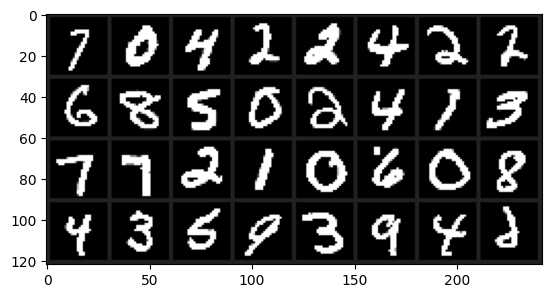

tensor([7, 0, 4, 2, 2, 4, 2, 2, 6, 8, 5, 0, 2, 4, 1, 3, 7, 7, 2, 1, 0, 6, 0, 8,
        4, 3, 5, 9, 3, 9, 4, 2])


In [5]:
def imshow(img, mean, std):
    img = img / std + mean # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images), 0.1307, 0.3081)
print(labels)

In [6]:
from torch import nn

class SimpleModel(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleModel, self).__init__()

        self.conv1 = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=5, padding=2, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Linear(14 * 14 * 32, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# from models import SimpleModel
model = SimpleModel().to(device)

In [8]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
num_steps = len(train_loader)

for epoch in range(num_epochs):

    # ---------- TRAINING ----------
    # set model to training
    model.train()

    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward
        outputs = model(images)

        # Compute Loss
        loss = criterion(outputs, labels)

        # Backward
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Print Log
        if (i + 1) % 100 == 0:
            print("Epoch {}/{} - Step: {}/{} - Loss: {:.4f}".format(
                    epoch, num_epochs, i, num_steps, total_loss / (i + 1)))

    # ---------- VALIDATION ----------
    # set model to evaluating
    model.eval()

    val_losses = 0

    with torch.no_grad():
        correct = 0
        total = 0
        for _, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            _, predicted = torch.max(outputs, 1)

            loss = criterion(outputs, labels)

            val_losses += loss.item()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print("Epoch {} - Accuracy: {} - Validation Loss : {:.4f}".format(
                epoch,
                correct / total,
                val_losses / (len(val_loader))))

Epoch 0/20 - Step: 99/1875 - Loss: 0.0602
Epoch 0/20 - Step: 199/1875 - Loss: 0.0565
Epoch 0/20 - Step: 299/1875 - Loss: 0.0578
Epoch 0/20 - Step: 399/1875 - Loss: 0.0569
Epoch 0/20 - Step: 499/1875 - Loss: 0.0574
Epoch 0/20 - Step: 599/1875 - Loss: 0.0561
Epoch 0/20 - Step: 699/1875 - Loss: 0.0564
Epoch 0/20 - Step: 799/1875 - Loss: 0.0577
Epoch 0/20 - Step: 899/1875 - Loss: 0.0598
Epoch 0/20 - Step: 999/1875 - Loss: 0.0596
Epoch 0/20 - Step: 1099/1875 - Loss: 0.0594
Epoch 0/20 - Step: 1199/1875 - Loss: 0.0589
Epoch 0/20 - Step: 1299/1875 - Loss: 0.0587
Epoch 0/20 - Step: 1399/1875 - Loss: 0.0588
Epoch 0/20 - Step: 1499/1875 - Loss: 0.0587
Epoch 0/20 - Step: 1599/1875 - Loss: 0.0585
Epoch 0/20 - Step: 1699/1875 - Loss: 0.0586
Epoch 0/20 - Step: 1799/1875 - Loss: 0.0584
Epoch 0 - Accuracy: 0.982 - Validation Loss : 0.0552
Epoch 1/20 - Step: 99/1875 - Loss: 0.0535
Epoch 1/20 - Step: 199/1875 - Loss: 0.0502
Epoch 1/20 - Step: 299/1875 - Loss: 0.0490
Epoch 1/20 - Step: 399/1875 - Loss: 0.

In [13]:
for stt, images in enumerate((
        'photo_6118490984477211115_y.jpg',
        'photo_6118490984477211116_y.jpg',
        'photo_6118490984477211117_y.jpg',
        'photo_6118490984477211118_y.jpg',
        'photo_6118490984477211119_y.jpg',
        'photo_6118490984477211120 _y.jpg',
        "digit.jpg",
)):
# for _, (images, labels) in enumerate(val_loader):
# # val_loader = torch.utils.data.DataLoader(
# #         datasets.MNIST("data", train=False, download=True,
# #                        transform=transforms.Compose([
# #                                transforms.ToTensor(),
# #                                transforms.Normalize((0.1307, ), (0.3081, )),
# #                                ])),
# #         batch_size=batch_size,
# #         shuffle=False)
# from torchvision.datasets import ImageFolder
# trainDataset = ImageFolder(root=config.TRAIN,
#         transform=trainTransforms)
# trainDataLoader = DataLoader(trainDataset, 
#         batch_size=config.BATCH_SIZE, shuffle=True)
    images = images.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    print(predicted)

AttributeError: 'str' object has no attribute 'to'